In [0]:
%matplotlib inline
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
print(tf.__version__)
print(keras.__version__)

2.2.0-rc3
2.3.1


In [0]:
from keras.datasets import cifar10
(x_train1, y_train1), (x_test1, y_test1) = cifar10.load_data()

In [0]:
print("Data Shapes")
print("Train",end = "");print(x_train1.shape,y_train1.shape)
print("Test",end = "");print(x_test1.shape,y_test1.shape)

Data Shapes
Train(50000, 32, 32, 3) (50000, 1)
Test(10000, 32, 32, 3) (10000, 1)


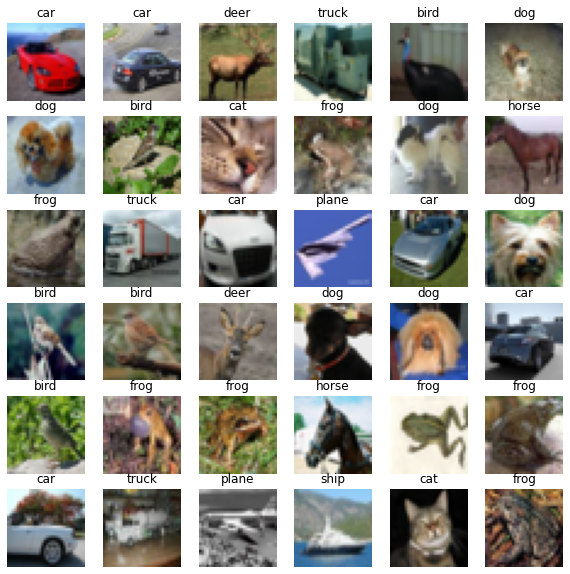

In [0]:
NUM_CLASSES = 10
imageDimesions = (32,32,3)

#dictionary of classes
code = {'plane':0, 'car':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}
#function getcode to get the value of key from dictionnary
def getcode (n):
    for i,j in code.items() :
        if j == n :
            return i
#display 36 random from the train dataset
plt.figure(figsize=(10,10))
for n, i in enumerate(list(np.random.randint(0,len(x_train1),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(x_train1[i])
    plt.axis('off')
    plt.title(getcode(y_train1[i]))


In [0]:
#calculate the number of samples for each category
num_of_samples = []
for x in range(0,10):
    num_of_samples.append((len(np.where(y_train1==x)[0])))

[5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]


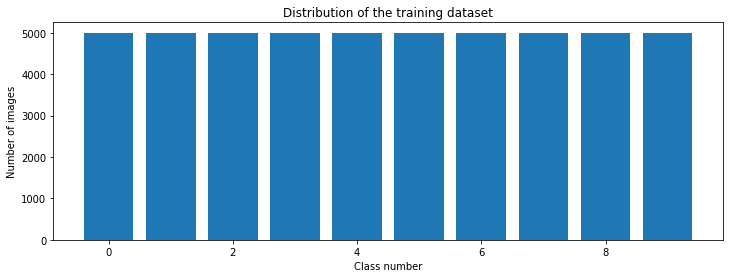

In [0]:
#display a bar chart that shows num_of_samples  
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, NUM_CLASSES), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
from keras.utils import to_categorical
#normalize values between 0 and 1 instead of 0 to 255
def preprocessing(img):
    img = (img/255)      
    return img
#preprocess all images
x_train2=np.array(list(map(preprocessing,x_train1)))  
x_test2=np.array(list(map(preprocessing,x_test1)))

# convert categorical TO numerical data 
y_train2= to_categorical(y_train1,NUM_CLASSES)
y_test2 = to_categorical(y_test1,NUM_CLASSES)


In [0]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout,BatchNormalization

In [0]:
def make_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same',  input_shape=(32,32,3)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same' ))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))
    
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(256, (3,3), padding='same'))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3,3), padding='same'))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(NUM_CLASSES, activation='softmax'))
    return model

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)       

In [0]:
INIT_LR = 3e-3  
EPOCHS = 20

In [0]:
model = make_model() 
model.compile(
    loss='categorical_crossentropy',  
    optimizer=keras.optimizers.adamax(lr=INIT_LR),  
    metrics=[['accuracy', 'mse']] 
)

In [0]:
history =model.fit(
    x_train2,y_train2, 
    epochs=EPOCHS,
    validation_data=(x_test2, y_test2),
    shuffle=True,
    verbose=1,
    initial_epoch= 0
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 119s 2ms/step - loss: 1.6055 - accuracy: 0.4870 - mse: 0.0677 - val_loss: 1.0499 - val_accuracy: 0.6318 - val_mse: 0.0491
Epoch 2/20
50000/50000 [==============================] - 122s 2ms/step - loss: 0.9745 - accuracy: 0.6655 - mse: 0.0452 - val_loss: 0.9494 - val_accuracy: 0.6674 - val_mse: 0.0451
Epoch 3/20
50000/50000 [==============================] - 119s 2ms/step - loss: 0.7532 - accuracy: 0.7414 - mse: 0.0357 - val_loss: 0.7227 - val_accuracy: 0.7522 - val_mse: 0.0342
Epoch 4/20
50000/50000 [==============================] - 120s 2ms/step - loss: 0.6212 - accuracy: 0.7852 - mse: 0.0299 - val_loss: 0.7191 - val_accuracy: 0.7574 - val_mse: 0.0338
Epoch 5/20
50000/50000 [==============================] - 121s 2ms/step - loss: 0.5334 - accuracy: 0.8150 - mse: 0.0260 - val_loss: 0.5294 - val_accuracy: 0.8213 - val_mse: 0.0255
Epoch 6/20
50000/50000 [==========================

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Test Score: 0.6088854509711266
Test Accuracy: 0.8450000286102295


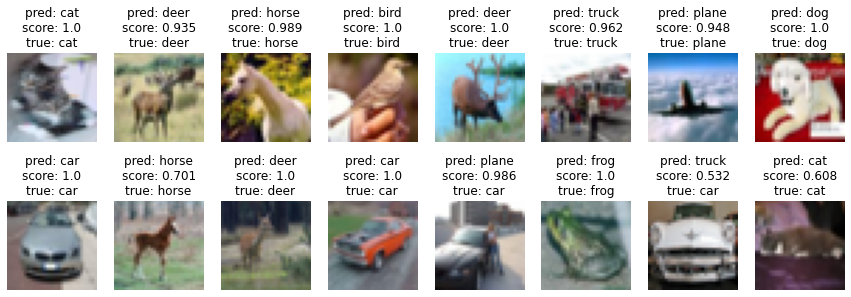

In [0]:
y_pred_test = model.predict_proba(x_test2)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

score =model.evaluate(x_test2,y_test2,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test1))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test1[random_index, :])
        pred_label =  getcode(y_pred_test_classes[random_index])
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = getcode(y_test1[random_index, 0])
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


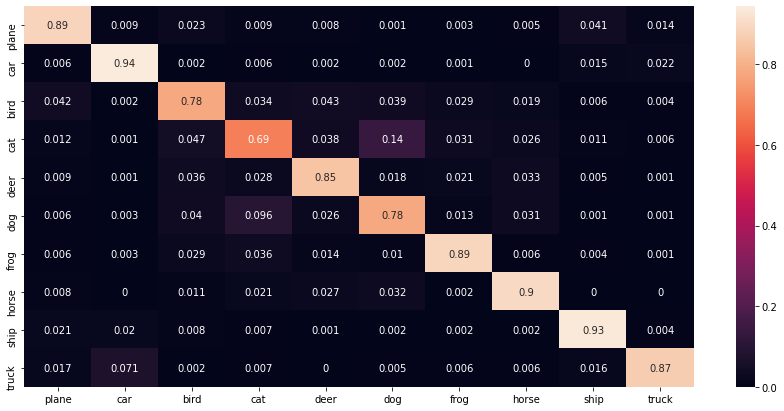

In [0]:
yPred = model.predict_classes(x_test2)
yTest_original=np.argmax(y_test2,axis=1)

class_names = np.unique(y_test1)

from sklearn.metrics import confusion_matrix
from pandas import DataFrame 
from seaborn import heatmap

cnf_matrix = confusion_matrix(y_true=yTest_original, y_pred=yPred, normalize='true')
plot_parameters = DataFrame(cnf_matrix, index = code.keys() ,columns = code.keys())
plt.figure(figsize = (15,7))
heatmap(plot_parameters, annot=True)


In [0]:
model.save('last_model_trained_.h5')
cv2.waitKey(0)

-1

# New Section